In [12]:
##lendo os dados 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.float.format',"{:.2f}".format)
dados_viagem = "/home/joao/Estudos_py_ml/analise_de_dados/projeto_pandas_governo/2023_Viagem.csv"

df_viagens = pd.read_csv(dados_viagem, encoding="Windows-1252", sep=";", decimal=",")

##craiando coluna de despesas 
df_viagens["Despesas"] = df_viagens["Valor diárias"] + df_viagens["Valor passagens"] + df_viagens["Valor outros gastos"]


##tratando dados nulos, como são muitos dados, ao inves de tirar, resolvi marcar como nao identificado na coluna Cargo 
df_viagens['Cargo'] = df_viagens['Cargo'].fillna("NÃO IDENTIFICADO")
df_viagens

#convertendo colunas de datas 
df_viagens["Período - Data de início"]  = pd.to_datetime(df_viagens["Período - Data de início"], dayfirst=True)
df_viagens["Período - Data de fim"]  = pd.to_datetime(df_viagens["Período - Data de fim"], dayfirst=True)

##criando novas colunas de data 
df_viagens["Mes da viagem"] = df_viagens["Período - Data de início"].dt.month_name()

df_viagens["dias de viagem"] =  (df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]).dt.days





In [13]:
# Criando tabela consolidada
df_viagens_consolidado = (df_viagens
    .groupby('Cargo')
    .agg(
        despesa_media=('Despesas', 'mean'),
        duracao_media=('dias de viagem', 'mean'),
        despesas_totais=('Despesas', 'sum'),
        destino_mais_frequente=('Destinos', pd.Series.mode),
        n_viagens=('Nome', 'count')
    )
    .reset_index()
    .sort_values(by='despesas_totais', ascending=False)
)

# Filtrando tabela consolidada por cargos relevantes (> 1% das viagens)
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
df_cargos.columns = ['Cargo', 'proportion']
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

# Chegando na tabela final - consolidada e filtrada!
df_final = df_viagens_consolidado[filtro].sort_values(by='n_viagens', ascending=False)


In [14]:
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mes da viagem,dias de viagem
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2023-01-01,2023-12-02,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00,January,335
1,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,2023-01-16,2024-02-28,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00,January,408
2,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NÃO IDENTIFICADO,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18,January,19
3,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,2023-02-05,2023-02-10,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96,February,5
4,18302983,000001/23,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52111,Comando da Aeronáutica,***.855.388-**,GREGOR GASPAR,NÃO IDENTIFICADO,OfIntermed,OfIntermed,2023-01-01,2023-07-07,Gotemburgo/Suécia,PARTICIPAR DO CURSO DE PILOTO DE GRIPEN C/D.,0.00,14903.10,0.00,0.00,14903.10,January,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826984,2023001618,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.748.269-**,BIANCA VIANA KIVEL,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2023-12-05,2023-12-06,Sem informação,Participar de tratativas nos locais das reuniõ...,606.89,3331.29,0.00,0.00,3938.18,December,1
826985,2023001619,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.231.806-**,LUCAS ALVES FREIRE,PROCURADOR DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-13,Sem informação,Participar da reunião do COPOM .,1089.00,1837.18,0.00,0.00,2926.18,December,2
826986,2023001628,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.632.011-**,SERGIO BOTELHO,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-07,2023-12-08,Sem informação,Acompanhamento do Presidente do BC - São Paulo,734.13,4555.95,0.00,0.00,5290.08,December,1
826987,2023001631,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.407.445-**,NELSON CAMPOS REIS JUNIOR,TECNICO DO BANCO CENTRAL,-1,Sem informação,2023-12-11,2023-12-11,Sem informação,Acompanhamento do Presidente - São Paulo.,319.28,3745.53,0.00,400.00,4464.81,December,0


In [15]:
df_final

,Cargo,despesa_media,duracao_media,despesas_totais,destino_mais_frequente,n_viagens
494,NÃO IDENTIFICADO,3260.26,8.01,1049266194.86,Brasília/DF,321835
443,Informações protegidas por sigilo,3137.48,7.41,370919369.30,Informações protegidas por sigilo,118222
569,PROFESSOR DO MAGISTERIO SUPERIOR,2032.08,3.87,110890764.22,Brasília/DF,54570
570,PROFESSOR ENS BASICO TECN TECNOLOGICO,1402.20,2.34,52548741.25,Brasília/DF,37476
315,CONTRATADO LEI 8745/93 - NI,984.45,2.84,17510463.07,Bauru/SP,17787
208,AUDITOR FISCAL FEDERAL AGROPECUARIO,1465.85,2.06,24306782.30,Brasília/DF,16582
72,ANALISTA AMBIENTAL,2596.94,5.13,35344371.79,Brasília/DF,13610
179,ASSISTENTE EM ADMINISTRAçãO,1291.03,2.17,15094703.63,Brasília/DF,11692
776,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1457.08,3.19,15816641.46,Brasília/DF,10855
686,TECNICO DO SEGURO SOCIAL,4302.48,11.37,45881679.92,Brasília/DF,10664


Text(0.5, 0, 'Despesa média')

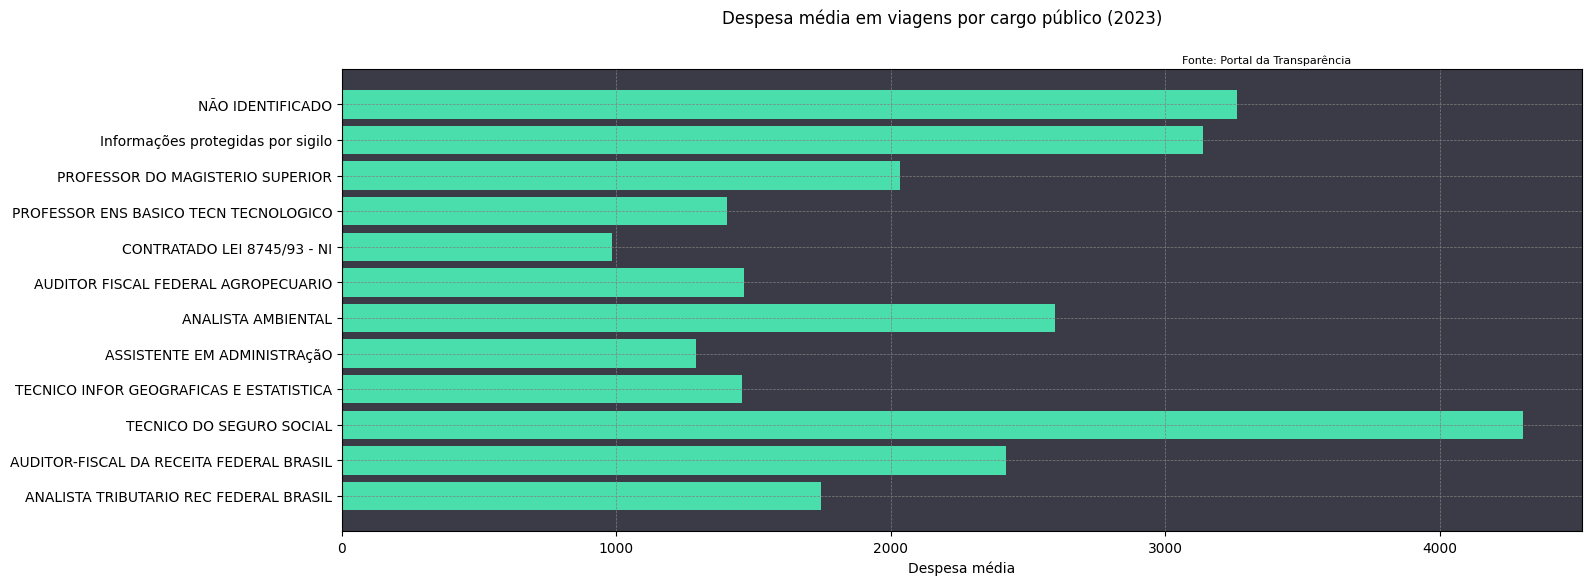

In [9]:
import matplotlib.pyplot as plt

#criacao de figura 
fig, ax = plt.subplots(figsize=(16, 6))

#plotando o grafico 
ax.barh(df_final['Cargo'], df_final['despesa_media'], color="#49deac")
ax.invert_yaxis()

##ajustando o grafico

ax.set_facecolor('#3b3b47')
fig.suptitle('Despesa média em viagens por cargo público (2023)')
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência', fontsize=8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=10)
plt.xlabel('Despesa média')


Text(0.5, 0, 'numero de viagens')

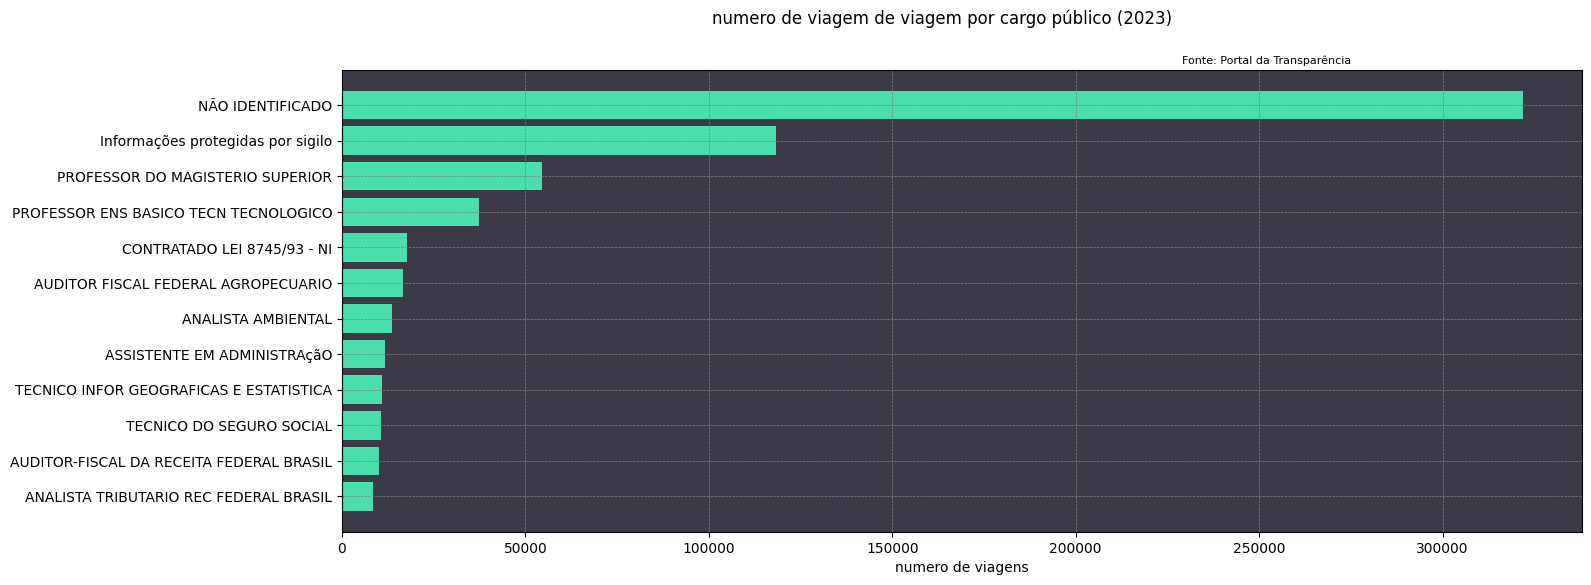

In [16]:
#criacao de figura 
fig, ax = plt.subplots(figsize=(16, 6))

#plotando o grafico 
ax.barh(df_final['Cargo'], df_final['n_viagens'], color="#49deac")
ax.invert_yaxis()

##ajustando o grafico

ax.set_facecolor('#3b3b47')
fig.suptitle('numero de viagem de viagem por cargo público (2023)')
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência', fontsize=8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=10)
plt.xlabel('numero de viagens')